# Outliers

In [1]:
! pip install prophet==1.1.5 plotly

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from prophet import Prophet

CSV_PATH_BR_LAND_TEMP = './data/processed/brazil_land_temp.csv'

df_br = pd.read_csv(CSV_PATH_BR_LAND_TEMP, 
                    parse_dates=['dt'])

df_br.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Month
0,1832-01-01,24.935,1.372,Brazil,1
1,1832-02-01,24.505,1.953,Brazil,2
2,1832-03-01,24.617,1.359,Brazil,3
3,1832-04-01,23.990,2.013,Brazil,4
4,1832-05-01,23.124,1.592,Brazil,5


In [3]:
df_train = pd.DataFrame()

df_train['ds'] = df_br.loc[:1999, 'dt']
df_train['y'] = df_br.loc[:1999, 'AverageTemperature']

print(df_train.shape)
df_train.head()

(2000, 2)


,ds,y
0,1832-01-01,24.935
1,1832-02-01,24.505
2,1832-03-01,24.617
3,1832-04-01,23.990
4,1832-05-01,23.124


In [4]:
df_test = pd.DataFrame()

df_test['ds'] = df_br.loc[2000:, 'dt']
df_test['y'] = df_br.loc[2000:, 'AverageTemperature']

print(df_test.shape)
df_test.head()

(164, 2)


,ds,y
2000,2000-01-01,25.653
2001,2000-02-01,25.463
2002,2000-03-01,25.446
2003,2000-04-01,25.102
2004,2000-05-01,24.614


In [5]:
model = Prophet()

model.fit(df_train)

df_future = model.make_future_dataframe(periods=150, freq='M')

predicions = model.predict(df_future)

predicions.head()

20:47:00 - cmdstanpy - INFO - Chain [1] start processing
20:47:00 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1832-01-01,23.959367,23.967167,25.119581,23.959367,23.959367,0.607761,0.607761,0.607761,0.607761,0.607761,0.607761,0.0,0.0,0.0,24.567128
1,1832-02-01,23.960482,23.972705,25.110833,23.960482,23.960482,0.591749,0.591749,0.591749,0.591749,0.591749,0.591749,0.0,0.0,0.0,24.552231
2,1832-03-01,23.961524,23.767489,24.872732,23.961524,23.961524,0.369199,0.369199,0.369199,0.369199,0.369199,0.369199,0.0,0.0,0.0,24.330724
3,1832-04-01,23.962639,23.264038,24.371233,23.962639,23.962639,-0.147005,-0.147005,-0.147005,-0.147005,-0.147005,-0.147005,0.0,0.0,0.0,23.815634
4,1832-05-01,23.963718,22.598768,23.702230,23.963718,23.963718,-0.783976,-0.783976,-0.783976,-0.783976,-0.783976,-0.783976,0.0,0.0,0.0,23.179742


In [6]:
filter_yhat_lower_limit = (df_train['y'] > predicions.loc[:1999, 'yhat_lower'])
filter_yhat_upper_limit = (df_train['y'] < predicions.loc[:1999, 'yhat_upper'])

no_outliers = df_train[filter_yhat_lower_limit & filter_yhat_upper_limit]

no_outliers.head()

,ds,y
0,1832-01-01,24.935
1,1832-02-01,24.505
2,1832-03-01,24.617
3,1832-04-01,23.990
4,1832-05-01,23.124


In [7]:
df_no_outliers = no_outliers[['ds', 'y']]

df_no_outliers.head()

,ds,y
0,1832-01-01,24.935
1,1832-02-01,24.505
2,1832-03-01,24.617
3,1832-04-01,23.990
4,1832-05-01,23.124


In [8]:
model = Prophet()

model.fit(df_no_outliers)

df_future = model.make_future_dataframe(periods=0)

predicions = model.predict(df_future)

predicions.head()

20:47:01 - cmdstanpy - INFO - Chain [1] start processing
20:47:01 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1832-01-01,24.040945,24.340611,25.054486,24.040945,24.040945,0.645778,0.645778,0.645778,0.645778,0.645778,0.645778,0.0,0.0,0.0,24.686723
1,1832-02-01,24.041720,24.235850,24.931994,24.041720,24.041720,0.531418,0.531418,0.531418,0.531418,0.531418,0.531418,0.0,0.0,0.0,24.573138
2,1832-03-01,24.042444,24.056529,24.710090,24.042444,24.042444,0.340449,0.340449,0.340449,0.340449,0.340449,0.340449,0.0,0.0,0.0,24.382893
3,1832-04-01,24.043219,23.477225,24.213209,24.043219,24.043219,-0.183997,-0.183997,-0.183997,-0.183997,-0.183997,-0.183997,0.0,0.0,0.0,23.859222
4,1832-05-01,24.043969,22.946372,23.665411,24.043969,24.043969,-0.728448,-0.728448,-0.728448,-0.728448,-0.728448,-0.728448,0.0,0.0,0.0,23.315521


/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


(array([22., 23., 24., 25., 26., 27.]),
 [Text(0, 22.0, '22'),
  Text(0, 23.0, '23'),
  Text(0, 24.0, '24'),
  Text(0, 25.0, '25'),
  Text(0, 26.0, '26'),
  Text(0, 27.0, '27')])

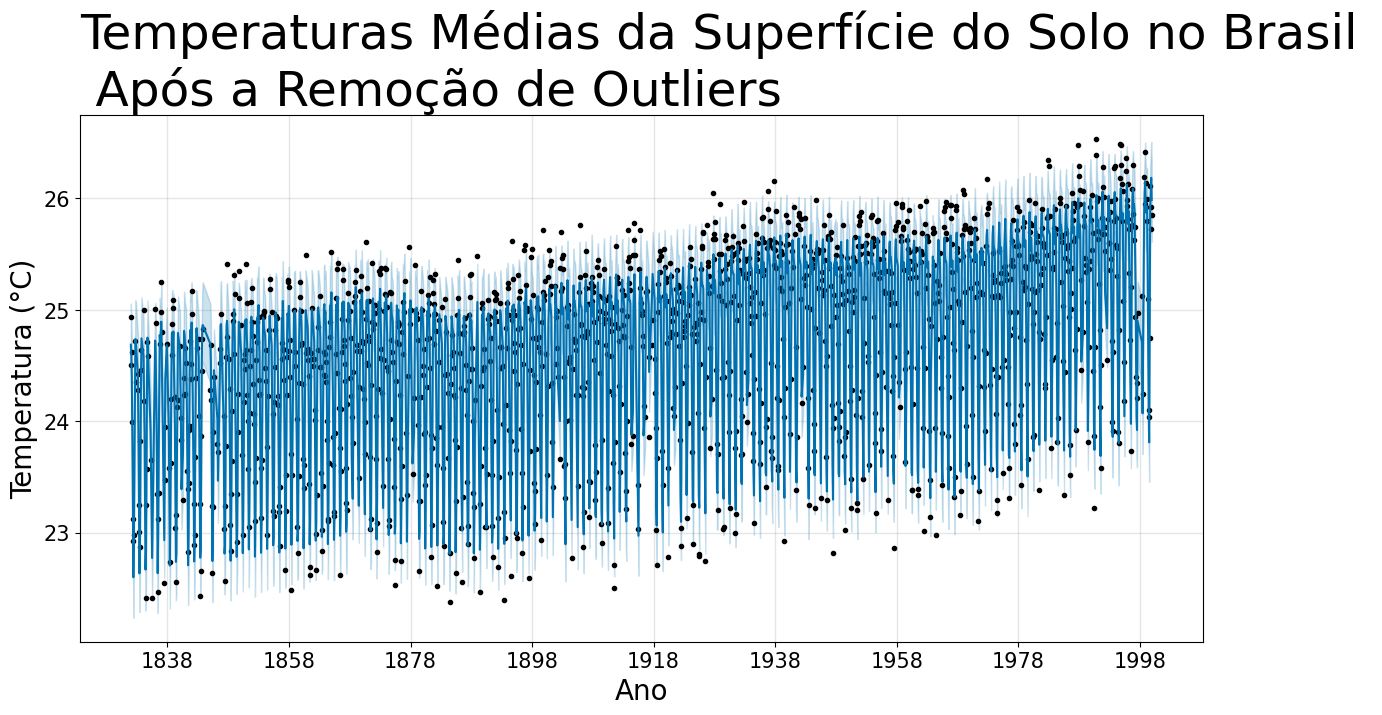

In [9]:
model.plot(predicions, figsize=(12,6))

plt.title('Temperaturas Médias da Superfície do '
          'Solo no Brasil \n Após a Remoção de Outliers', 
          loc='left', 
          fontsize=35)

plt.xlabel('Ano', fontsize=20)
plt.ylabel('Temperatura (°C)', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [10]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df_no_outliers['y'], predicions.loc[:1629, 'yhat'])

0.07640713294439437

## Intervalo de confiança

In [11]:
model = Prophet(interval_width=.8) # default

model.fit(df_no_outliers)

df_future = model.make_future_dataframe(periods=300, freq='M')

predicions = model.predict(df_future)

predicions.head()

20:47:02 - cmdstanpy - INFO - Chain [1] start processing
20:47:02 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1832-01-01,24.040945,24.332666,25.062362,24.040945,24.040945,0.645778,0.645778,0.645778,0.645778,0.645778,0.645778,0.0,0.0,0.0,24.686723
1,1832-02-01,24.041720,24.241819,24.928856,24.041720,24.041720,0.531418,0.531418,0.531418,0.531418,0.531418,0.531418,0.0,0.0,0.0,24.573138
2,1832-03-01,24.042444,24.029781,24.745492,24.042444,24.042444,0.340449,0.340449,0.340449,0.340449,0.340449,0.340449,0.0,0.0,0.0,24.382893
3,1832-04-01,24.043219,23.516711,24.225059,24.043219,24.043219,-0.183997,-0.183997,-0.183997,-0.183997,-0.183997,-0.183997,0.0,0.0,0.0,23.859222
4,1832-05-01,24.043969,22.975064,23.676094,24.043969,24.043969,-0.728448,-0.728448,-0.728448,-0.728448,-0.728448,-0.728448,0.0,0.0,0.0,23.315521


/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


(array([22., 23., 24., 25., 26., 27., 28.]),
 [Text(0, 22.0, '22'),
  Text(0, 23.0, '23'),
  Text(0, 24.0, '24'),
  Text(0, 25.0, '25'),
  Text(0, 26.0, '26'),
  Text(0, 27.0, '27'),
  Text(0, 28.0, '28')])

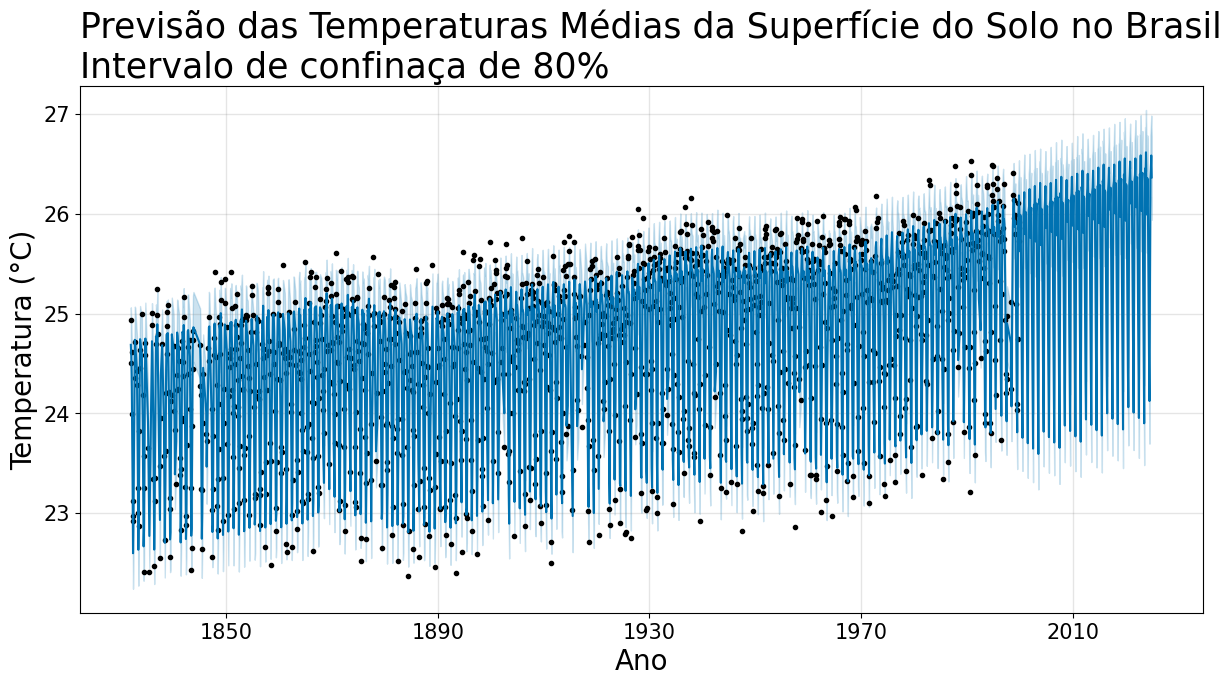

In [12]:
model.plot(predicions, figsize=(12,6))

plt.title('Previsão das Temperaturas Médias da Superfície do '
          'Solo no Brasil\nIntervalo de confinaça de 80%', 
          loc='left', 
          fontsize=25)

plt.xlabel('Ano', fontsize=20)
plt.ylabel('Temperatura (°C)', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

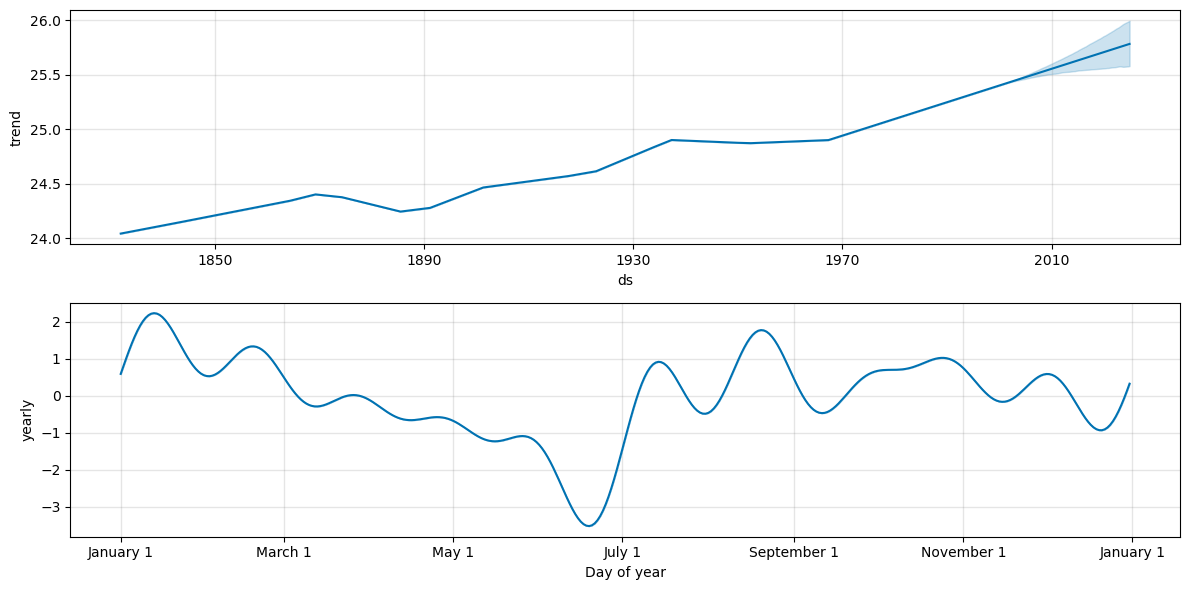

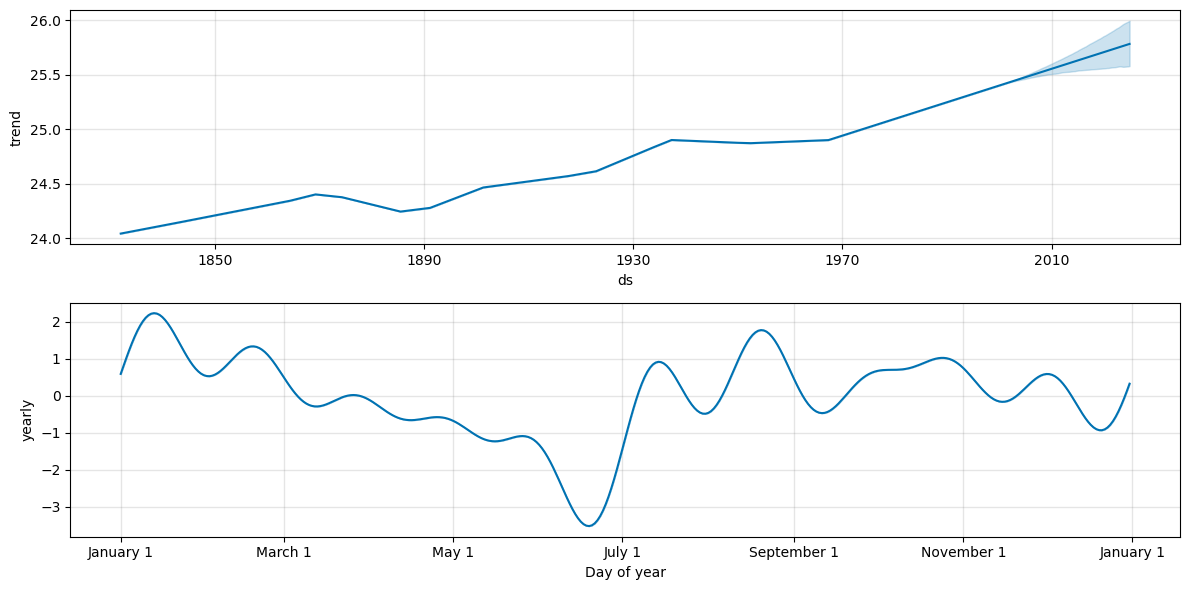

In [13]:
model.plot_components(predicions, figsize=(12, 6))

In [14]:
model = Prophet(interval_width=.95)

model.fit(df_no_outliers)

df_future = model.make_future_dataframe(periods=300, freq='M')

predicions = model.predict(df_future)

predicions.head()

20:47:02 - cmdstanpy - INFO - Chain [1] start processing
20:47:02 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1832-01-01,24.040945,24.173871,25.180403,24.040945,24.040945,0.645778,0.645778,0.645778,0.645778,0.645778,0.645778,0.0,0.0,0.0,24.686723
1,1832-02-01,24.041720,24.024088,25.110211,24.041720,24.041720,0.531418,0.531418,0.531418,0.531418,0.531418,0.531418,0.0,0.0,0.0,24.573138
2,1832-03-01,24.042444,23.885397,24.921518,24.042444,24.042444,0.340449,0.340449,0.340449,0.340449,0.340449,0.340449,0.0,0.0,0.0,24.382893
3,1832-04-01,24.043219,23.277685,24.402493,24.043219,24.043219,-0.183997,-0.183997,-0.183997,-0.183997,-0.183997,-0.183997,0.0,0.0,0.0,23.859222
4,1832-05-01,24.043969,22.824974,23.871227,24.043969,24.043969,-0.728448,-0.728448,-0.728448,-0.728448,-0.728448,-0.728448,0.0,0.0,0.0,23.315521


/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


(array([21., 22., 23., 24., 25., 26., 27., 28.]),
 [Text(0, 21.0, '21'),
  Text(0, 22.0, '22'),
  Text(0, 23.0, '23'),
  Text(0, 24.0, '24'),
  Text(0, 25.0, '25'),
  Text(0, 26.0, '26'),
  Text(0, 27.0, '27'),
  Text(0, 28.0, '28')])

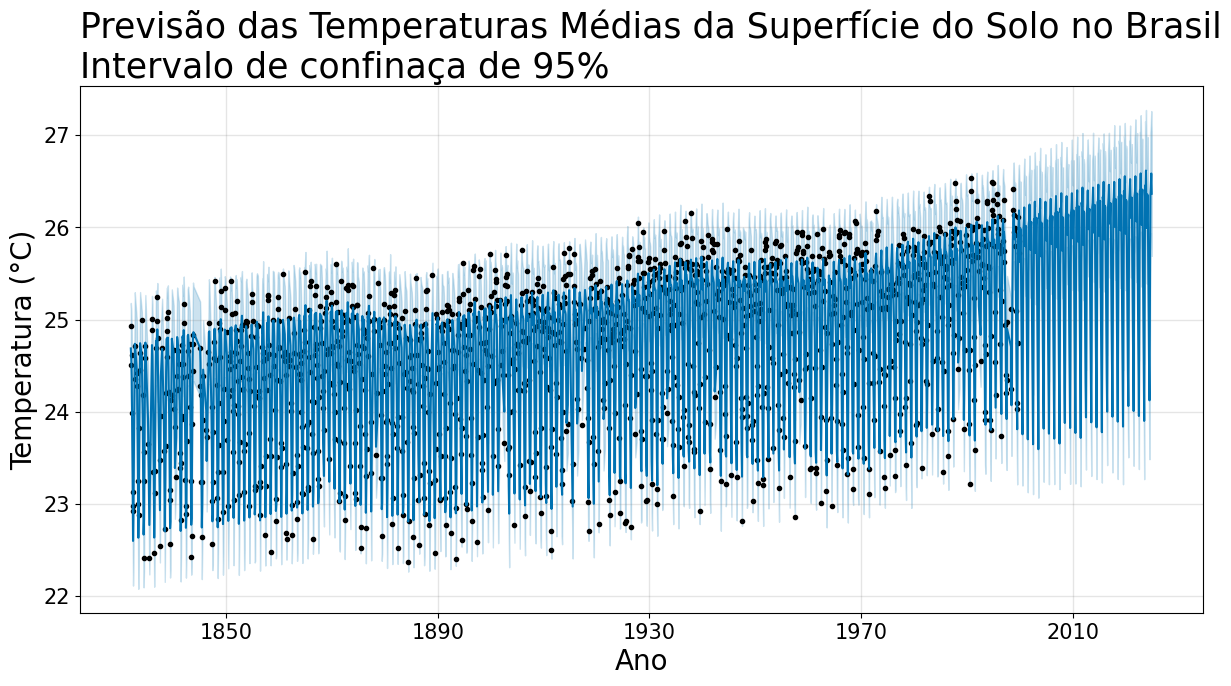

In [15]:
model.plot(predicions, figsize=(12,6))

plt.title('Previsão das Temperaturas Médias da Superfície do '
          'Solo no Brasil\nIntervalo de confinaça de 95%', 
          loc='left', 
          fontsize=25)

plt.xlabel('Ano', fontsize=20)
plt.ylabel('Temperatura (°C)', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

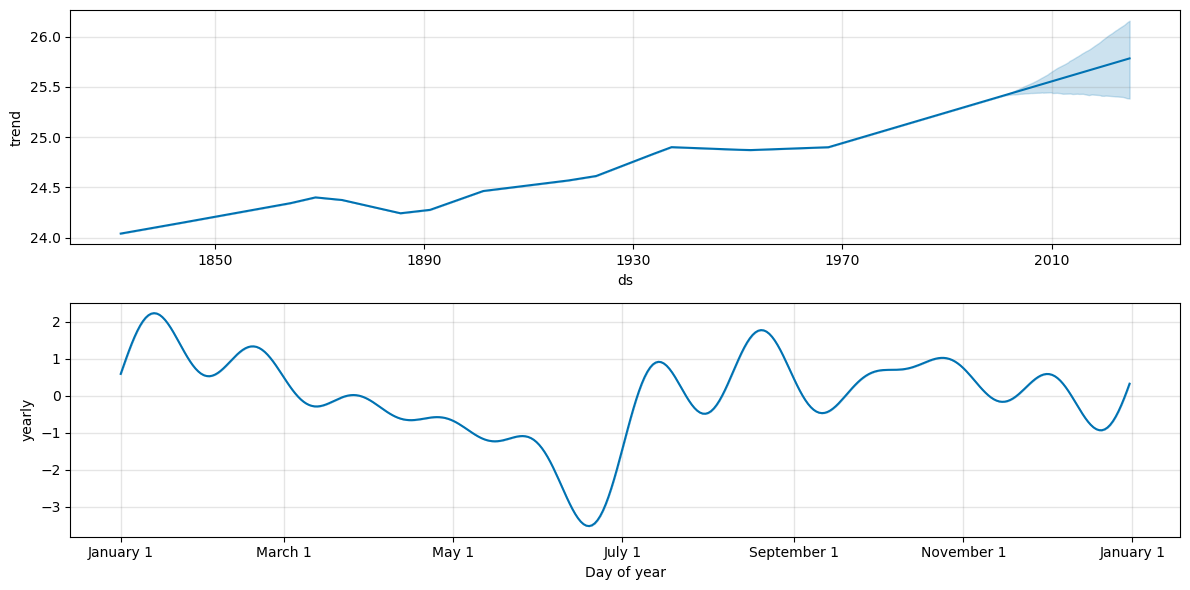

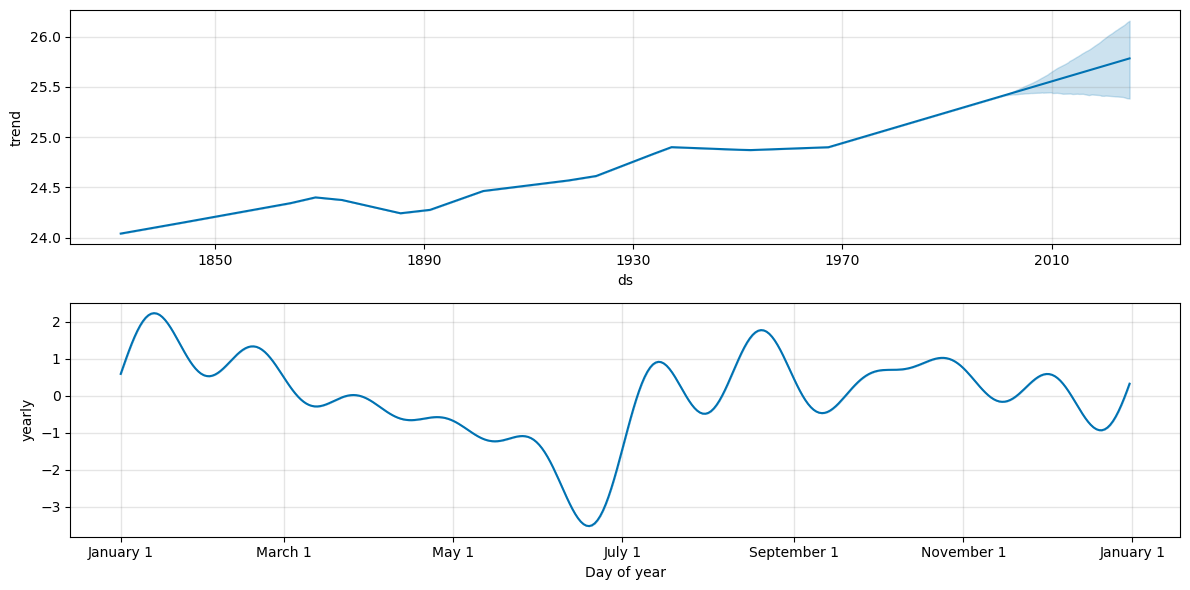

In [16]:
model.plot_components(predicions, figsize=(12, 6))

In [17]:
samples = model.predictive_samples(predicions)

samples

{'yhat': array([[24.38904092, 24.51741848, 24.6660852 , ..., 24.9842345 ,
         24.78574443, 24.42825205],
        [24.7830478 , 24.43867302, 25.08553289, ..., 24.47575851,
         24.8048791 , 24.46143744],
        [24.69709837, 24.20710418, 24.00417196, ..., 24.65523958,
         24.7401434 , 24.39495115],
        ...,
        [26.19157035, 26.50109176, 26.85893096, ..., 27.15172551,
         26.8712103 , 26.25041536],
        [26.09868299, 27.03848657, 26.73811631, ..., 26.79398546,
         27.18666795, 26.51788392],
        [26.48204794, 26.31592993, 26.29295213, ..., 26.82679132,
         26.4757875 , 26.15652035]]),
 'trend': array([[24.04094496, 24.04094496, 24.04094496, ..., 24.04094496,
         24.04094496, 24.04094496],
        [24.04171962, 24.04171962, 24.04171962, ..., 24.04171962,
         24.04171962, 24.04171962],
        [24.0424443 , 24.0424443 , 24.0424443 , ..., 24.0424443 ,
         24.0424443 , 24.0424443 ],
        ...,
        [25.72730066, 25.80903116, 25

(array([23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ]),
 [Text(0, 23.5, '23.5'),
  Text(0, 24.0, '24.0'),
  Text(0, 24.5, '24.5'),
  Text(0, 25.0, '25.0'),
  Text(0, 25.5, '25.5'),
  Text(0, 26.0, '26.0'),
  Text(0, 26.5, '26.5'),
  Text(0, 27.0, '27.0')])

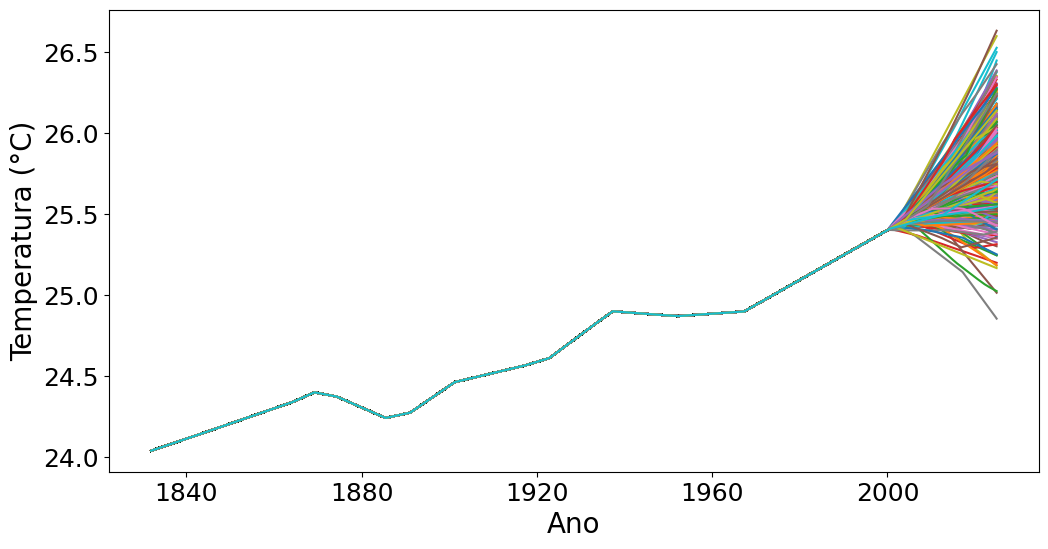

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

ax = plt.plot(predicions['ds'],
                   samples['trend'])

plt.xlabel('Ano', fontsize=20)
plt.ylabel('Temperatura (°C)', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

In [20]:
df_no_outliers.to_csv('./data/processed/df_br_no_outliers.csv', index=False)